In [ ]:
import numpy as np
import pandas as pd

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Data From July22-Now

In [ ]:
pcla_julysep = pd.read_csv('pcla_julysep.csv')

In [ ]:
pcla.head()

,emailName,subjectLine,category,sentCount,scheduledDateTimestamp,timeSent,delivered,deliveredPercent,bounced,bouncedPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent,spamReport,spamReportPercent,sentFromGid
0,Dedicated Email Blast for Self Care Challah,WIN A COPY OF BRAIDED! Private Challah Worksho...,General Information,1619,2020-10-04 13:48:25-10:00,13:48:25,1619,100.00,0,0.00,963,59.48,477,29.46,28,1.73,21,4.40,6,1.26,1,0.06,2,0.12,0,0,9
1,September 2020 Newsletter 2,Welcome to LA yPenn and Bake Tasty Challah!,General Information,1618,2020-09-29 08:26:15-10:00,8:26:15,1614,99.75,4,0.25,1197,74.16,677,41.95,79,4.89,65,9.60,37,5.47,11,0.68,1,0.06,0,0,9
2,Dedicated Email Blast for Self Care Challah,DON'T MISS...Private Challah Workshop With Bet...,General Information,1620,2020-09-20 10:38:11-10:00,10:38:11,1620,100.00,0,0.00,1311,80.93,668,41.23,56,3.46,44,6.59,27,4.04,3,0.19,4,0.25,0,0,9
3,Corrected September 2020 Newsletter 1,"Corrected Links! Dual Career Success Panel, an...",General Information,1617,2020-09-09 10:31:44-10:00,10:31:44,1617,100.00,0,0.00,1074,66.42,626,38.71,73,4.51,63,10.06,28,4.47,2,0.12,0,0.00,0,0,9
4,September 2020 Newsletter 1,"Dual Career Success Panel, Bake Tasty Challah,...",General Information,1619,2020-09-09 08:00:00-10:00,8:00:00,1619,100.00,0,0.00,1107,68.38,634,39.16,114,7.04,92,14.51,42,6.62,3,0.19,1,0.06,0,0,9


In [ ]:
pcla_julysep.describe()

,sentCount,delivered,deliveredPercent,bounced,bouncedPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent,spamReport,spamReportPercent,sentFromGid
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0
mean,1510.428571,1509.714286,99.956429,0.714286,0.043571,1119.142857,88.635714,587.071429,42.072857,57.571429,8.622143,46.428571,11.755000,30.642857,7.847857,6.357143,0.392143,1.285714,0.078571,0.0,0.0,9.0
std,417.185204,416.980802,0.074380,1.204388,0.074380,316.420085,57.449242,168.237682,13.109096,27.648103,18.827135,23.650384,15.908707,18.399863,10.956548,5.982116,0.368285,1.540658,0.095664,0.0,0.0,0.0
min,61.000000,61.000000,99.750000,0.000000,0.000000,174.000000,58.530000,52.000000,29.460000,9.000000,0.550000,9.000000,1.310000,4.000000,0.580000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9.0
25%,1619.000000,1619.000000,99.940000,0.000000,0.000000,1075.000000,66.910000,572.250000,37.540000,42.750000,2.627500,32.000000,4.785000,23.000000,3.405000,1.250000,0.075000,0.000000,0.000000,0.0,0.0,9.0
50%,1621.500000,1621.500000,100.000000,0.000000,0.000000,1165.500000,73.495000,635.000000,39.625000,51.000000,3.670000,40.500000,7.440000,27.000000,4.795000,5.500000,0.340000,1.000000,0.060000,0.0,0.0,9.0
75%,1624.750000,1623.000000,100.000000,1.000000,0.060000,1285.500000,80.830000,674.750000,42.242500,76.000000,4.852500,61.750000,9.945000,39.250000,6.627500,10.000000,0.620000,1.750000,0.105000,0.0,0.0,9.0
max,1626.000000,1625.000000,100.000000,4.000000,0.250000,1502.000000,285.250000,715.000000,85.250000,114.000000,73.770000,92.000000,65.380000,79.000000,44.230000,21.000000,1.290000,5.000000,0.310000,0.0,0.0,9.0


In [ ]:
pcla_julysep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   emailName               14 non-null     object 
 1   subjectLine             14 non-null     object 
 2   category                14 non-null     object 
 3   sentCount               14 non-null     int64  
 4   scheduledDateTimestamp  14 non-null     object 
 5   timeSent                14 non-null     object 
 6   delivered               14 non-null     int64  
 7   deliveredPercent        14 non-null     float64
 8   bounced                 14 non-null     int64  
 9   bouncedPercent          14 non-null     float64
 10  opens                   14 non-null     int64  
 11  opensPercent            14 non-null     float64
 12  uniqueOpens             14 non-null     int64  
 13  uniqueOpensPercent      14 non-null     float64
 14  clicks                  14 non-null     int6

In [ ]:
boolean = pcla_julysep.drop_duplicates()

In [ ]:
df = pcla_julysep.copy()

In [ ]:
newdf = df.drop(columns=['spamReport', 'spamReportPercent','sentFromGid', 'bounced', 'bouncedPercent', 'category', 'emailName'])
newdf.set_index('subjectLine', inplace = True)

In [ ]:
newdf.corr()

,sentCount,delivered,deliveredPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent
sentCount,1.000000,0.999996,-0.168913,0.861018,-0.984575,0.915540,-0.947867,0.129176,-0.996077,0.149669,-0.970446,0.121497,-0.955056,0.307145,0.307725,0.240711,0.236917
delivered,0.999996,1.000000,-0.166108,0.861272,-0.984488,0.915591,-0.947829,0.128043,-0.996177,0.148481,-0.970729,0.119966,-0.955486,0.306388,0.306970,0.241291,0.237507
deliveredPercent,-0.168913,-0.166108,1.000000,-0.058939,0.194365,-0.139519,0.169122,-0.410390,0.132636,-0.432409,0.066344,-0.538335,0.015092,-0.313283,-0.312805,0.157267,0.161387
opens,0.861018,0.861272,-0.058939,1.000000,-0.758820,0.961902,-0.677825,-0.038997,-0.870033,-0.043109,-0.889799,-0.022570,-0.869730,0.312156,0.312039,0.446620,0.444925
opensPercent,-0.984575,-0.984488,0.194365,-0.758820,1.000000,-0.842382,0.980327,-0.179319,0.976451,-0.206762,0.936959,-0.160318,0.925075,-0.284700,-0.285500,-0.155457,-0.151186
uniqueOpens,0.915540,0.915591,-0.139519,0.961902,-0.842382,1.000000,-0.739668,0.122070,-0.911491,0.115834,-0.908676,0.062182,-0.901809,0.335588,0.336645,0.311232,0.309433
uniqueOpensPercent,-0.947867,-0.947829,0.169122,-0.677825,0.980327,-0.739668,1.000000,-0.119753,0.944530,-0.158800,0.903962,-0.150623,0.884656,-0.246213,-0.246365,-0.156429,-0.151509
clicks,0.129176,0.128043,-0.410390,-0.038997,-0.179319,0.122070,-0.119753,1.000000,-0.041181,0.987533,0.102695,0.799872,0.091872,0.050761,0.051468,-0.385165,-0.386765
clicksPercent,-0.996077,-0.996177,0.132636,-0.870033,0.976451,-0.911491,0.944530,-0.041181,1.000000,-0.062846,0.987082,-0.048074,0.971493,-0.303715,-0.304255,-0.276966,-0.273282
uniqueClicks,0.149669,0.148481,-0.432409,-0.043109,-0.206762,0.115834,-0.158800,0.987533,-0.062846,1.000000,0.089133,0.831012,0.085231,0.002097,0.002536,-0.381509,-0.382200


In [ ]:
newdf.head()

,sentCount,scheduledDateTimestamp,timeSent,delivered,deliveredPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent
subjectLine,,,,,,,,,,,,,,,,,,,
WIN A COPY OF BRAIDED! Private Challah Workshop With Beth Ricanati!,1619,2020-10-04 13:48:25-10:00,13:48:25,1619,100.00,963,59.48,477,29.46,28,1.73,21,4.40,6,1.26,1,0.06,2,0.12
Welcome to LA yPenn and Bake Tasty Challah!,1618,2020-09-29 08:26:15-10:00,8:26:15,1614,99.75,1197,74.16,677,41.95,79,4.89,65,9.60,37,5.47,11,0.68,1,0.06
"DON'T MISS...Private Challah Workshop With Beth Ricanati, MD!",1620,2020-09-20 10:38:11-10:00,10:38:11,1620,100.00,1311,80.93,668,41.23,56,3.46,44,6.59,27,4.04,3,0.19,4,0.25
"Corrected Links! Dual Career Success Panel, and More!",1617,2020-09-09 10:31:44-10:00,10:31:44,1617,100.00,1074,66.42,626,38.71,73,4.51,63,10.06,28,4.47,2,0.12,0,0.00
"Dual Career Success Panel, Bake Tasty Challah, and More!",1619,2020-09-09 08:00:00-10:00,8:00:00,1619,100.00,1107,68.38,634,39.16,114,7.04,92,14.51,42,6.62,3,0.19,1,0.06


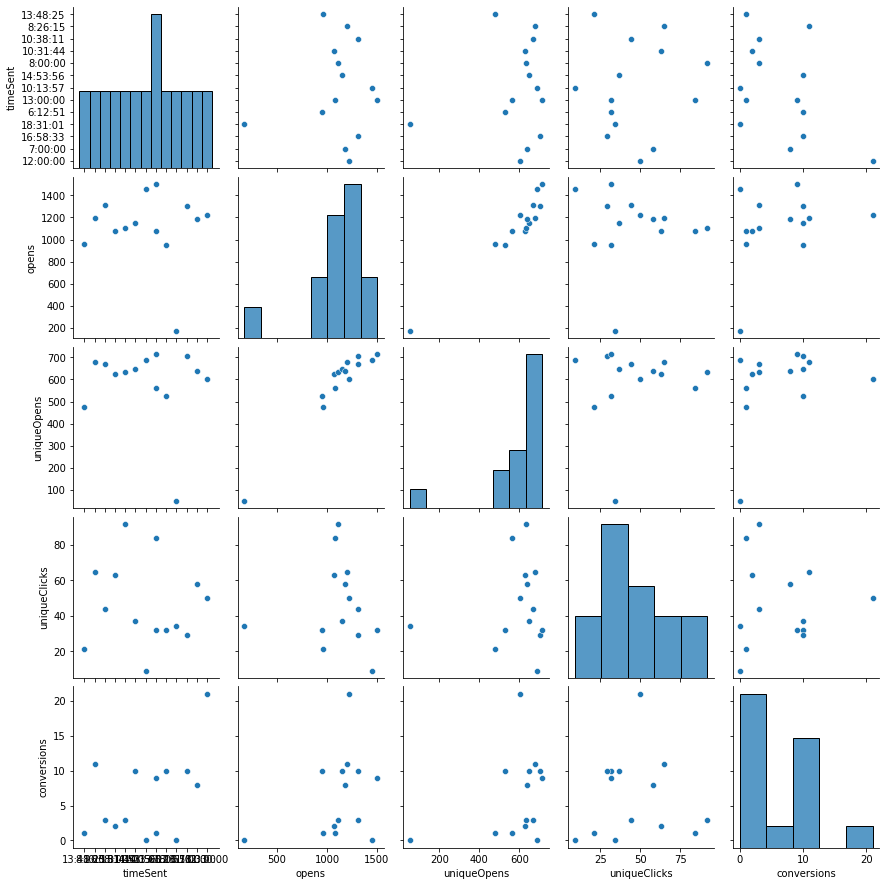

In [ ]:
sns.pairplot(newdf, vars=['timeSent', 'opens', 'uniqueOpens', 'uniqueClicks', 'conversions'])

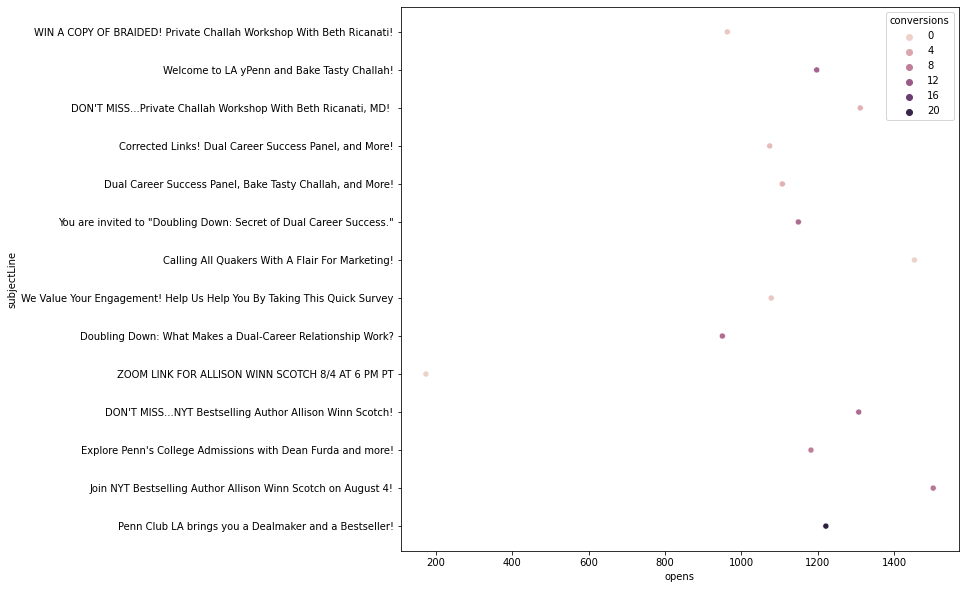

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='subjectLine', x='opens', data=newdf, hue='conversions')

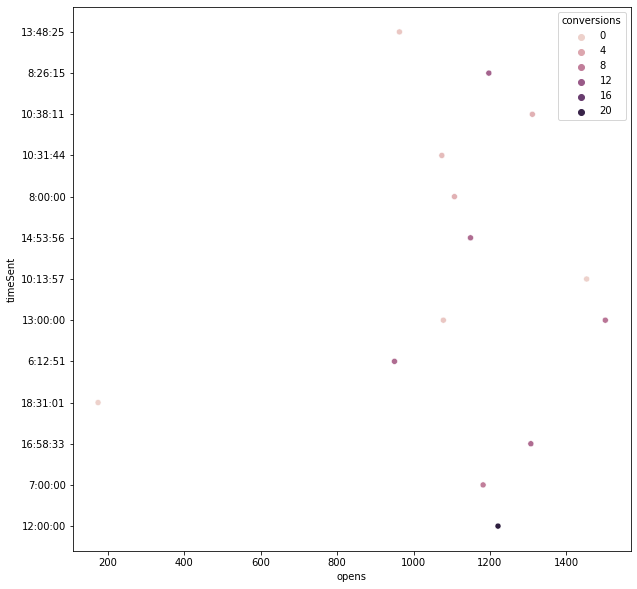

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='timeSent', x='opens', data=newdf, hue='conversions')

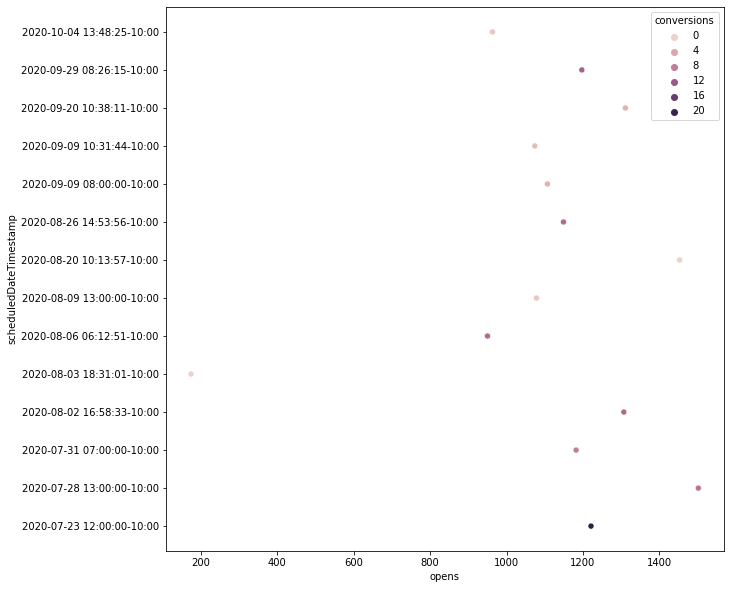

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='scheduledDateTimestamp', x='opens', data=newdf, hue='conversions')

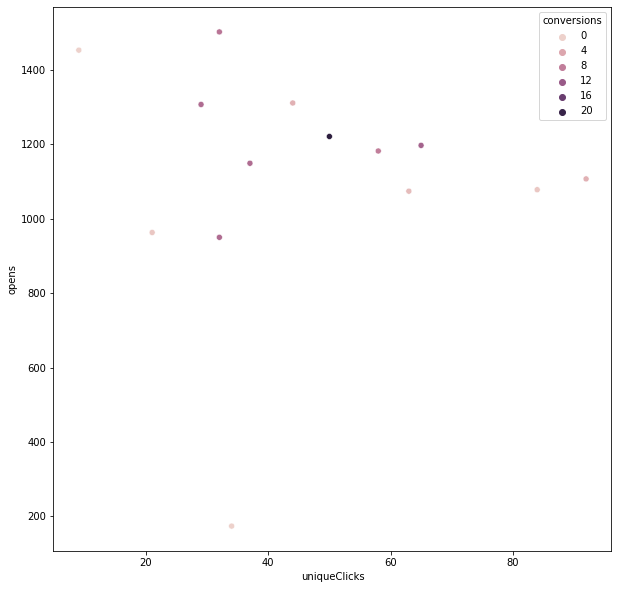

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='opens', x='uniqueClicks', data=newdf, hue='conversions')

In [ ]:
#LargestConversion
largestConversion = newdf[newdf.conversions == newdf.conversions.max()]
print(largestConversion)
largestConversion['conversions']
largestConversion['scheduledDateTimestamp']

                                                    sentCount  ... unsubscribesPercent
subjectLine                                                    ...                    
Penn Club LA brings you a Dealmaker and a Bests...       1624  ...                0.06

[1 rows x 19 columns]


subjectLine
Penn Club LA brings you a Dealmaker and a Bestseller!    2020-07-23 12:00:00-10:00
Name: scheduledDateTimestamp, dtype: object

In [ ]:
#SmallestConversion
smallestConversion = newdf[newdf.conversions == newdf.conversions.min()]
print(smallestConversion)
smallestConversion['conversions']
smallestConversion['scheduledDateTimestamp']

                                                  sentCount  ... unsubscribesPercent
subjectLine                                                  ...                    
Calling All Quakers With A Flair For Marketing!        1625  ...                0.31
ZOOM LINK FOR ALLISON WINN SCOTCH 8/4 AT 6 PM PT         61  ...                0.00

[2 rows x 19 columns]


subjectLine
Calling All Quakers With A Flair For Marketing!     2020-08-20 10:13:57-10:00
ZOOM LINK FOR ALLISON WINN SCOTCH 8/4 AT 6 PM PT    2020-08-03 18:31:01-10:00
Name: scheduledDateTimestamp, dtype: object

In [ ]:
totalEmails3Q = 14

totalUniqueOpen3Q = newdf['uniqueOpens'].sum()
print("Total Unique Open:", totalUniqueOpen3Q)

totalUniqueClick3Q = newdf['uniqueClicks'].sum()
print("Total Unique Open:", totalUniqueClick3Q)

Total Unique Open: 8219
Total Unique Open: 650


Data From Jan01 to July 22nd

In [ ]:
pcla_janjuly = pd.read_csv('pcla_janjuly.csv')
boolean = pcla_janjuly.drop_duplicates()
dfjan = pcla_janjuly.copy()
newdfjan = dfjan.drop(columns=['spamReport', 'spamReportPercent','sentFromGid', 'bounced', 'bouncedPercent', 'category', 'emailName'])
newdfjan.set_index('subjectLine', inplace = True)
newdfjan.describe()

,sentCount,delivered,deliveredPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent
count,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1704.862069,1701.862069,99.814138,1309.172414,128.71931,633.310345,46.696552,88.724138,8.186207,71.206897,12.619310,56.758621,10.787241,7.482759,0.338621,1.655172,0.055172
std,1737.054315,1730.081722,0.547895,960.770043,112.15836,494.223858,16.098071,85.900647,12.310553,66.273448,13.069013,47.288367,12.415600,15.277483,0.689647,3.772796,0.067328
min,34.000000,33.000000,97.060000,127.000000,41.09000,26.000000,26.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1583.000000,1575.000000,99.880000,1008.000000,76.33000,510.000000,36.610000,36.000000,2.530000,29.000000,5.390000,28.000000,4.930000,0.000000,0.000000,0.000000,0.000000
50%,1613.000000,1612.000000,99.940000,1247.000000,87.72000,649.000000,42.990000,74.000000,5.640000,57.000000,9.110000,52.000000,7.780000,1.000000,0.060000,1.000000,0.060000
75%,1619.000000,1619.000000,100.000000,1455.000000,104.06000,705.000000,47.230000,111.000000,8.060000,90.000000,14.870000,74.000000,10.830000,4.000000,0.380000,2.000000,0.120000
max,7619.000000,7604.000000,100.000000,4675.000000,552.83000,2185.000000,83.020000,430.000000,51.030000,325.000000,58.040000,227.000000,56.250000,56.000000,3.450000,19.000000,0.250000


In [ ]:
newdfjan.head()

,sentCount,scheduledDateTimestamp,delivered,deliveredPercent,opens,opensPercent,uniqueOpens,uniqueOpensPercent,clicks,clicksPercent,uniqueClicks,uniqueClicksPercent,initialClicks,initialClicksPercent,conversions,conversionsPercent,unsubscribes,unsubscribesPercent
subjectLine,,,,,,,,,,,,,,,,,,
Now with VIDEO! So many Penn events - there's one for you!,1621,2020-07-14 05:50:00-10:00,1620,99.94,1239,76.48,529,32.65,111,6.85,90,17.01,68,12.85,8,0.49,1,0.06
Win a cookbook! Don't Miss Our Foodie Cooking Class July 23!,1621,2020-07-13 05:56:51-10:00,1621,100.00,666,41.09,427,26.34,5,0.31,5,1.17,5,1.17,1,0.06,0,0.00
Lunch & Learn with Penn Alum Farhana Pargac of UTA on July 28!,1622,2020-07-09 05:00:00-10:00,1621,99.94,1825,112.58,690,42.57,103,6.35,78,11.30,74,10.72,56,3.45,3,0.19
Don't miss the Penn Club LA Zoom Cooking Class on July 23!,1622,2020-07-07 05:52:28-10:00,1622,100.00,1250,77.07,534,32.92,36,2.22,25,4.68,22,4.12,2,0.12,0,0.00
Zoom Link for Tonight's Q&A with Jamil Smith!,145,2020-06-30 10:10:19-10:00,145,100.00,364,251.03,108,74.48,74,51.03,53,49.07,52,48.15,1,0.69,0,0.00


In [ ]:
totalEmails1h = 29

totalUniqueOpen1h = newdfjan['uniqueOpens'].sum()
print("Total Unique Open:", totalUniqueOpen1h)

totalUniqueClick1h = newdfjan['uniqueClicks'].sum()
print("Total Unique Click:", totalUniqueClick1h)

Total Unique Open: 18366
Total Unique Open: 2065


In [ ]:
perEmailUniqueOpen3Q = totalUniqueOpen3Q / totalEmails3Q
print("Per Email Unique Open 3Q:", perEmailUniqueClick3Q)
perEmailUniqueClick3Q = totalUniqueClick3Q / totalEmails3Q
print("Per Email Unique Click 3Q:", perEmailUniqueClick3Q)
perEmailUniqueOpen1h = totalUniqueOpen1h / totalEmails1h
print("Per Email Unique Open 1h:", perEmailUniqueOpen1h)
perEmailUniqueClick1h = totalUniqueClick1h / totalEmails1h
print("Per Email Unique Click 1h:", perEmailUniqueClick1h)


changeUniqeOpen = ((perEmailUniqueOpen3Q - perEmailUniqueOpen1h) / perEmailUniqueOpen1h) * 100
print("Change in uniqueOpen: ", changeUniqeOpen)

changeUniqueClick = ((perEmailUniqueClick3Q - perEmailUniqueClick1h) / perEmailUniqueClick1h ) * 100
print("Change in uniqueClick: ", changeUniqueClick) 

Per Email Unique Open 3Q: 46.42857142857143
Per Email Unique Click 3Q: 46.42857142857143
Per Email Unique Open 1h: 633.3103448275862
Per Email Unique Click 1h: 71.20689655172414
Change in uniqueOpen:  -7.301146528523199
Change in uniqueClick:  -34.79764787270841
